# vina_demo

## Colab Setup

1. Check the runtime instance
2. Choose whether to use Google Drive (persistence) or temp `/content`
3. Install required Python packages
4. Get course files/data into the runtime
5. Mount Google Drive for persistent storage


In [40]:
# @title 1) Check the runtime
import sys, platform, os, textwrap
print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
print("Working dir:", os.getcwd())

!arch

Python: 3.12.12
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Working dir: /content
x86_64


In [41]:
# @title 2) Choose whether to use Google Drive (persistence)
#
# If you want your edits to persist across sessions, use **Drive**.
# If you're just running a quick exercise, you can skip Drive and use the temporary Colab filesystem (`/content`).

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# @title Create directories `~/structbio_course/data` and `~/structbio_course/outputs`

import os
from pathlib import Path

# Change this folder name once; everything else uses it.
COURSE_DIR_NAME = "structbio_course"  # you can rename for your course

USE_DRIVE = True

if "drive" in str(Path("/content/drive")) and os.path.exists("/content/drive") and USE_DRIVE:
    ROOT = Path("/content/drive/MyDrive") / COURSE_DIR_NAME
else:
    ROOT = Path("/content") / COURSE_DIR_NAME

ROOT.mkdir(parents=True, exist_ok=True)

DATA_DIR = ROOT / "data"
(DATA_DIR).mkdir(exist_ok=True)

OUTPUTS_DIR = ROOT / "outputs"
(OUTPUTS_DIR).mkdir(exist_ok=True)

print("ROOT:", ROOT)
print("Use Path object DATA_DIR to access:", DATA_DIR)
print("Use Path object OUTPUTS_DIR to access:", OUTPUTS_DIR)


ROOT: /content/drive/MyDrive/structbio_course
Use Path object DATA_DIR to access: /content/drive/MyDrive/structbio_course/data
Use Path object OUTPUTS_DIR to access: /content/drive/MyDrive/structbio_course/outputs



*   List item
*   List item



... and unzip the archive


In [43]:

# @title Copy over a zip archive of data files and code needed for the *vina* exercise ... and unzip

import os, pathlib, urllib.request

RAW_URL = "https://raw.githubusercontent.com/vvoelz/chem5412-spring2026/main/data/assignment02.zip"
zip_path = pathlib.Path(DATA_DIR) / "assignment02.zip"

urllib.request.urlretrieve(RAW_URL, zip_path)
print("Saved to:", zip_path)

!unzip {zip_path}
!cp -r assignment02 {DATA_DIR}

print(f'Unzipped folder `assignment02` moved to {DATA_DIR}')

Saved to: /content/drive/MyDrive/structbio_course/data/assignment02.zip
Archive:  /content/drive/MyDrive/structbio_course/data/assignment02.zip
replace assignment02/input_files/4ey7.pdb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: assignment02/input_files/4ey7.pdb  
  inflating: assignment02/input_files/4ey5.pdb  
  inflating: assignment02/input_files/human_AChE_binders.csv  
  inflating: assignment02/input_files/4ey5_receptor.pdb  
  inflating: assignment02/input_files/4ey7_receptor_prepped.pdb  
  inflating: assignment02/input_files/rivastigmine/rivastigmine_out.pdbqt  
  inflating: assignment02/input_files/rivastigmine/rivastigmine.pdbqt  
  inflating: assignment02/input_files/rivastigmine/rivastigmine.mol2  
  inflating: assignment02/input_files/rivastigmine/config_singledock  
  inflating: assignment02/input_files/rivastigmine/rivastigmine.smiles  
  inflating: assignment02/input_files/huperzine/huperzine.smiles  
  inflating: assignment02/input_files/huperzine/huperzine.

In [44]:
# @title Download the vina executable

!wget https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.3/vina_1.2.3_linux_x86_64
!mv vina_1.2.3_linux_x86_64 vina #rename the vina_1.2.3_linux_x86_64 as vina
!chmod +x vina

--2026-02-20 14:12:10--  https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.3/vina_1.2.3_linux_x86_64
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/258054635/ae531efa-011f-44eb-86d3-dc1115228edc?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-20T14%3A49%3A00Z&rscd=attachment%3B+filename%3Dvina_1.2.3_linux_x86_64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-02-20T13%3A48%3A24Z&ske=2026-02-20T14%3A49%3A00Z&sks=b&skv=2018-11-09&sig=SYyVESfmCFmSZJedtcxixlkAzQkKxnqz5hxRkyl9pVA%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc3MTU5NzAzMCwibmJmIjoxNzcxNTk2NzMwLCJwYXRoIjoicmVsZWFzZWF

## Download packages need for preparing receptor and ligand

**NOTE**: condacolab is needed to install the mgltools package.  Installing this will cause a restart of the kernel. If you get a warning about this, you can ignore it.   Becsue of this, we will later have to reload the DATA_DIR and OUTPUTS_DIR Path

In [45]:
# @title (1) Install Condacolab (< 1min)
%%time

!pip install -q condacolab
import condacolab
condacolab.install()

#@markdown > An automatic restart of the kernel is expected after the execution of this block.
#@markdown >
#@markdown > Stay connected to the same runtime and proceed to the next code block!


Traceback (most recent call last):
  File "/usr/local/bin/pip", line 7, in <module>
    from pip import main
ImportError: No module named pip
✨🍰✨ Everything looks OK!
CPU times: user 1.84 s, sys: 321 ms, total: 2.16 s
Wall time: 2.28 s


In [46]:
# @title Let's inspect the new conda info
!conda info

Traceback (most recent call last):
  File "/usr/local/bin/conda", line 12, in <module>
    from conda.cli import main
ImportError: No module named conda.cli


In [47]:
# @title Install Python packages (~1 min)
!conda install -c conda-forge -c bioconda mgltools openbabel zlib --yes

Traceback (most recent call last):
  File "/usr/local/bin/conda", line 12, in <module>
    from conda.cli import main
ImportError: No module named conda.cli


In [48]:
# @title Verify that mgltools has been installed

import shutil

# Find the pathname of prepare_receptor4.py
receptor_prep_script = shutil.which('prepare_receptor4.py')
print(f'Path to prepare_receptor4.py: {receptor_prep_script}')

# Find the pathname of prepare_ligand4.py
ligand_prep_script = shutil.which('prepare_ligand4.py')
print(f'Path to prepare_ligand4.py: {ligand_prep_script}')

# Check if python2 is available
python2_path = shutil.which('python2')
print(f'Path to python2: {python2_path}')

#@markdown > You should see that the executables `prepare_receptor4.py` and `prepare_ligand4.py` are available in your path
#@markdown >
#@markdown > You should also have Python2 (!) available to run these scripts

Path to prepare_receptor4.py: /usr/local/bin/prepare_receptor4.py
Path to prepare_ligand4.py: /usr/local/bin/prepare_ligand4.py
Path to python2: /usr/local/bin/python2


In [49]:
# @title Reinstantiate Path objects and create INPUT_FILES = DATA_DIR / `assignment02/input_files`

import os
from pathlib import Path

# Change this folder name once; everything else uses it.
COURSE_DIR_NAME = "structbio_course"  # you can rename for your course

USE_DRIVE = True

if "drive" in str(Path("/content/drive")) and os.path.exists("/content/drive") and USE_DRIVE:
    ROOT = Path("/content/drive/MyDrive") / COURSE_DIR_NAME
else:
    ROOT = Path("/content") / COURSE_DIR_NAME

ROOT.mkdir(parents=True, exist_ok=True)

DATA_DIR = ROOT / "data"
(DATA_DIR).mkdir(exist_ok=True)

OUTPUTS_DIR = ROOT / "outputs"
(OUTPUTS_DIR).mkdir(exist_ok=True)

INPUT_FILES = DATA_DIR / "assignment02/input_files"

print("ROOT:", ROOT)
print("Use Path object DATA_DIR to access:", DATA_DIR)
print("Use Path object OUTPUTS_DIR to access:", OUTPUTS_DIR)
print()
print("Use Path object INPUT_FILES to access:", INPUT_FILES)



ROOT: /content/drive/MyDrive/structbio_course
Use Path object DATA_DIR to access: /content/drive/MyDrive/structbio_course/data
Use Path object OUTPUTS_DIR to access: /content/drive/MyDrive/structbio_course/outputs

Use Path object INPUT_FILES to access: /content/drive/MyDrive/structbio_course/data/assignment02/input_files


# Preparation of receptors and ligands for docking

## Receptors

Here, we will use the [mgltools](https://ccsb.scripps.edu/mgltools/) to prepare PDBQT files for all three human AChE receptors.   I have already cleaned up these files and prepped them fo docking:
* **4ey7_receptor_prepped.pdb** - receptor structure of AChE from AChE-donepezil complex
* **4ey5_receptor_prepped.pdb** - receptor structure of AChE from AChE-huperzine A complex
* **4ey6_receptor_prepped.pdb** - receptor structure of AChE from AChE-galantamine complex

## Receptors

We will also prepare PDBQT files for *five* AChE inhibitors:

| Ligand        | SMILES                                                                 | IC50 (nM) |
|---------------|------------------------------------------------------------------------|-----------|
| donepezil     | COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC                   | 8.00      |
| huperzine A   | CC=C1C2CC3=C(C1(CC(=C2)C)N)C=CC(=O)N3                                  | 17.0      |
| galantamine   | CN1CCC23C=CC(CC2OC4=C(C=CC(=C34)C1)OC)O                                | 2010      |
| rivastigmine  | CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C                                     | 32100     |
| AC6           | ClC1=C(NC=2C=CC(Cl)=CC12)C(=O)NC3=NC(=CS3)                             | 280       |



In [50]:
# @title Create PDBQT files for receptors (~12 s)

import os
from pathlib import Path

receptor_codes = ['4ey7', '4ey5', '4ey6']

for rec_code in receptor_codes:

    receptor_prepped_pdb = INPUT_FILES / f'{rec_code}_receptor_prepped.pdb'
    receptor_pdbqt = INPUT_FILES / f'receptor_{rec_code}.pdbqt'
    !{python2_path} {receptor_prep_script} -r {receptor_prepped_pdb} -o {receptor_pdbqt} -U nphs_lps -v


set verbose to  True
read  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/4ey7_receptor_prepped.pdb
setting up RPO with mode= automatic and outputfilename=  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/receptor_4ey7.pdbqt
charges_to_add= gasteiger
delete_single_nonstd_residues= None
adding gasteiger charges to peptide
set verbose to  True
read  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/4ey5_receptor_prepped.pdb
setting up RPO with mode= automatic and outputfilename=  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/receptor_4ey5.pdbqt
charges_to_add= gasteiger
delete_single_nonstd_residues= None
adding gasteiger charges to peptide
set verbose to  True
read  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/4ey6_receptor_prepped.pdb
setting up RPO with mode= automatic and outputfilename=  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/receptor_4ey6.

In [51]:
# @title Create PDBQT files for the ligands (~3 s)

import os, sys
import pandas as pd

df = pd.read_csv(INPUT_FILES / 'human_AChE_binders.csv')
"""
ligand,SMILES,IC50(nM)
donepezil,COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC,8.00
huperzine,CC=C1C2CC3=C(C1(CC(=C2)C)N)C=CC(=O)N3,17.0
galantamine,CN1CCC23C=CC(CC2OC4=C(C=CC(=C34)C1)OC)O,2010
rivastigmine,32100
AC6,ClC1=C(NC=2C=CC(Cl)=CC12)C(=O)NC3=NC(=CS3)C4CCNCC4,280
"""

def run_cmd(cmd, testing=False):
    """Run a shell command on the UNIX command line.

    OPTIONS
    testing          If True, just print the cmd. Default: False
    """

    print('>>', cmd)
    if not testing:
        os.system(cmd)

# Create a series of directories containing each ligand
ligand_list = []
ligand_list += [str(df.loc[index,'ligand']) for index, row in df.iterrows()]

smiles_list = []
smiles_list += [str(df.loc[index,'SMILES']) for index, row in df.iterrows()]

for i in range(len(smiles_list)):

    ligand = ligand_list[i]
    smiles = smiles_list[i]
    print(f"{ligand}, {smiles} ")

    ligdir = INPUT_FILES / ligand
    if not os.path.exists(ligdir):
        os.mkdir(ligdir)

    # Write the ligand to file
    smilesfile = os.path.join(ligdir, f'{ligand}.smiles')
    fout = open(smilesfile, 'w')
    fout.write(smiles)
    fout.close()
    print(f'Wrote: {smilesfile}')

    # Use OpenBabel to convert the SMILES into a 3D MOL2 format and
    # perform a weighted rotor search for lowest energy conformer
    mol2file = smilesfile.replace('.smiles','.mol2')

    os.system(f'obabel {smilesfile} -O {mol2file} --gen3d --best --canonical --conformers --weighted --nconf 50 --ff GAFF')
    print(f'  ...  {mol2file}')

    # Then, prepare ligands for docking using the Autodock script
    pdbqtfile = smilesfile.replace('.smiles','.pdbqt')

    ### ... for some reason the script does not work with files on other directories
    local_mol2file = os.path.basename(mol2file)
    cmd = f'cp {mol2file} {local_mol2file}'   # make a local copy of the mol2file
    run_cmd(cmd)  #, testing=True)

    local_pdbqtfile = os.path.basename(pdbqtfile)
    cmd = f'python2 {ligand_prep_script} -l {local_mol2file} -o {local_pdbqtfile} -U nphs_lps -v'
    run_cmd(cmd)  #, testing=True)
    print(f'  ...  {pdbqtfile}')

    # Cleanup!
    cmd = f'mv {local_pdbqtfile} {pdbqtfile}' # move the local outputfile to the ligand directory
    run_cmd(cmd)  #, testing=True)

    cmd = f'rm {local_mol2file}' # remove the local mol2file
    run_cmd(cmd)  #, testing=True)

donepezil, COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=C4)OC 
Wrote: /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/donepezil.smiles
  ...  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/donepezil.mol2
>> cp /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/donepezil.mol2 donepezil.mol2
>> python2 /usr/local/bin/prepare_ligand4.py -l donepezil.mol2 -o donepezil.pdbqt -U nphs_lps -v
  ...  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/donepezil.pdbqt
>> mv donepezil.pdbqt /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/donepezil.pdbqt
>> rm donepezil.mol2
huperzine, CC=C1C2CC3=C(C1(CC(=C2)C)N)C=CC(=O)N3 
Wrote: /content/drive/MyDrive/structbio_course/data/assignment02/input_files/huperzine/huperzine.smiles
  ...  /content/drive/MyDrive/structbio_course/data/assignment02/input_files/huperzine/huperzine.mol2
>> cp /content/driv

In [52]:
# @title Dock all five ligands to all three receptors (~9 min)

# @markdown ---
# @markdown **Note:** This code is inefficient because we're running a new
# @markdown vina job for every ligand(!).  There is a lot of overhead in loading
# @markdown a grid and keeping it in memory and once loaded, many ligands are
# @markdown usually screened. For our purposes here, we require only
# @markdown 15 total calculations, so we can afford some inefficiencies.

import os, sys
from shutil import copyfile

# Receptors
receptor_codes = ['4ey7', '4ey5', '4ey6']

# Ligand directories
ligdirs = ['donepezil', 'galantamine', 'huperzine', 'rivastigmine', 'AC6']

for rec_code in receptor_codes:

    if rec_code == '4ey7':
        # NOTE: the mean xyz coords for donezepil in 4ey7_chainA.pdb is -14.1,-43.8,27.7
        center_x, center_y, center_z = -14.1, -43.8, 27.7   # Angstrom
        size_x, size_y, size_z = 30, 30, 30
    if rec_code == '4ey5':
        # NOTE: the mean xyz coords for huperzine in 4ey5_chainA.pdb is -9.453	-43.660	31.879
        center_x, center_y, center_z = -9.453, -43.66, 31.88   # Angstrom
        size_x, size_y, size_z = 30, 30, 30
    if rec_code == '4ey6':
        # NOTE: the mean xyz coords for galantamine in 4ey6_chainA.pdb is -9.942	-43.488	30.291
        center_x, center_y, center_z = -9.94, -43.49,	30.29   # Angstrom
        size_x, size_y, size_z = 30, 30, 30

    for ligand in ligdirs:

        receptor_pdbqt = INPUT_FILES / f'receptor_{rec_code}.pdbqt'

        LIG_DIR = INPUT_FILES / ligand
        ligand_pdbqt  = LIG_DIR / f'{ligand}.pdbqt'
        config_file = LIG_DIR / f"config_singledock_{rec_code}"

        OUTFILE = OUTPUTS_DIR / f'docking_{rec_code}_{ligand}.pdbqt'
        LOGFILE = OUTPUTS_DIR / f'docking_{rec_code}_{ligand}.log'

        with open(config_file, "w") as f:
            f.write(f"""# CONFIGURATION FILE

    # INPUT OPTIONS
    receptor = {receptor_pdbqt}
    ligand = {ligand_pdbqt}
    # flex = [flexible residues in receptor in pdbqt format]

    # SEARCH SPACE CONFIGURATIONS
    # Center of the box (coordinates x, y and z
    center_x = {center_x}
    center_y = {center_y}
    center_z = {center_z}
    # Size of the box (dimensions in x, y and z)
    size_x = {size_x}
    size_y = {size_y}
    size_z = {size_z}

    # OUTPUT OPTIONS
    out = {OUTFILE}
    # log = {LOGFILE}

    # OTHER OPTIONS
    # cpu = [value] # more cpus reduces the computation time
    # exhaustiveness = [value] # search time for finding the global minimum, default is 8
    # num_modes = [value] # maximum number of binding modes to generate, default is 9
    # energy_range = [value] # maximum energy difference between the best binding mode and the worst one displayed (kcal/mol), default is 3
    # seed = [value] # explicit random seed, not required
        """)

        cmd = f'./vina --config {config_file}'
        run_cmd(cmd)   #, testing=True)

        print(f'Wrote: {OUTFILE}')


>> ./vina --config /content/drive/MyDrive/structbio_course/data/assignment02/input_files/donepezil/config_singledock_4ey7
Wrote: /content/drive/MyDrive/structbio_course/outputs/docking_4ey7_donepezil.pdbqt
>> ./vina --config /content/drive/MyDrive/structbio_course/data/assignment02/input_files/galantamine/config_singledock_4ey7
Wrote: /content/drive/MyDrive/structbio_course/outputs/docking_4ey7_galantamine.pdbqt
>> ./vina --config /content/drive/MyDrive/structbio_course/data/assignment02/input_files/huperzine/config_singledock_4ey7
Wrote: /content/drive/MyDrive/structbio_course/outputs/docking_4ey7_huperzine.pdbqt
>> ./vina --config /content/drive/MyDrive/structbio_course/data/assignment02/input_files/rivastigmine/config_singledock_4ey7
Wrote: /content/drive/MyDrive/structbio_course/outputs/docking_4ey7_rivastigmine.pdbqt
>> ./vina --config /content/drive/MyDrive/structbio_course/data/assignment02/input_files/AC6/config_singledock_4ey7
Wrote: /content/drive/MyDrive/structbio_course/out

# Analysis of the docking results

## RMSD-to-xtal pose

To calculate the RMSD-to-xtal each each docked pose, we will use a tool called [DockRMSD](https://zhanggroup.org/DockRMSD/) from the Zhang group at University of Michigan to compute RMSD for molecules with symmetry or permuted atom orders.)

In [53]:
# @title Download DOCKRMSD

!wget https://seq2fun.dcmb.med.umich.edu//DockRMSD/DockRMSD.gz
!gunzip DockRMSD.gz
!chmod +x ./DockRMSD

--2026-02-20 14:21:20--  https://seq2fun.dcmb.med.umich.edu//DockRMSD/DockRMSD.gz
Resolving seq2fun.dcmb.med.umich.edu (seq2fun.dcmb.med.umich.edu)... 141.213.137.249
Connecting to seq2fun.dcmb.med.umich.edu (seq2fun.dcmb.med.umich.edu)|141.213.137.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499138 (487K) [application/x-gzip]
Saving to: ‘DockRMSD.gz’

DockRMSD.gz         100%[===================>] 487.44K  --.-KB/s    in 0.08s   

2026-02-20 14:21:20 (5.94 MB/s) - ‘DockRMSD.gz’ saved [499138/499138]

gzip: DockRMSD already exists; do you wish to overwrite (y or n)? y


In [54]:
# @title Convert the receptor-bound and docked poses of donepezil to *.mol2 format, which DockRMSD expects


ligands = ['donepezil', 'huperzine', 'galantamine']
receptor_codes = ['4ey7', '4ey5', '4ey6']

ligand_rec_pairs = list(zip(ligands, receptor_codes))

for pair in ligand_rec_pairs:

    ligand = pair[0]
    rec_code = pair[1]

    if rec_code == '4ey7':
        # convert the 4ey7 donepezil xtal structure pose to mol2
        !cat {INPUT_FILES / '4ey7_chainA.pdb'}  | grep E20 > {INPUT_FILES / 'donepezil_xtal.pdb'}
        XTAL_MOL2 = INPUT_FILES / 'donepezil_xtal.mol2'
        !obabel {INPUT_FILES / 'donepezil_xtal.pdb'}  -O {XTAL_MOL2} --ff GAFF

    elif rec_code == '4ey5':
        # convert the 4ey5 huperzine A xtal structure pose to mol2
        !cat {INPUT_FILES / '4ey5_chainA.pdb'}  | grep HUP > {INPUT_FILES / 'huperzine_xtal.pdb'}
        XTAL_MOL2 = INPUT_FILES / 'huperzine_xtal.mol2'
        !obabel {INPUT_FILES / 'huperzine_xtal.pdb'}  -O {XTAL_MOL2} --ff GAFF

    elif rec_code == '4ey6':
        # convert the 4ey6 galantamine xtal structure pose to mol2
        !cat {INPUT_FILES / '4ey6_chainA.pdb'}  | grep GNT > {INPUT_FILES / 'galantamine_xtal.pdb'}
        XTAL_MOL2 = INPUT_FILES / 'galantamine_xtal.mol2'
        !obabel {INPUT_FILES / 'galantamine_xtal.pdb'}  -O {XTAL_MOL2} --ff GAFF
    else:
        print(f'rec_code = {rec_code} unrecognized!!!')
        break


    DOCKED_POSES_PDBQT = OUTPUTS_DIR / f'docking_{rec_code}_{ligand}.pdbqt'
    DOCKED_POSES_MOL2 = OUTPUTS_DIR / f'docking_{rec_code}_{ligand}.mol2'

    # convert our docking poses to mol2 -- produces numbered output files for each pose
    !obabel {DOCKED_POSES_PDBQT} -O {DOCKED_POSES_MOL2} -m


1 molecule converted
9 molecules converted
9 files output. The first is /content/drive/MyDrive/structbio_course/outputs/docking_4ey7_donepezil1.mol2
1 molecule converted
8 molecules converted
8 files output. The first is /content/drive/MyDrive/structbio_course/outputs/docking_4ey5_huperzine1.mol2
1 molecule converted
8 molecules converted
8 files output. The first is /content/drive/MyDrive/structbio_course/outputs/docking_4ey6_galantamine1.mol2


In [55]:
# @title Compile the scores for each docked pose in a CSV file with columns: pose,score
#
# For the **self-docking** results, add an extra right-hand column with the RMSD-to-xtal


import os, sys, subprocess

def run_cmd(cmd, testing=False):
    """Run a shell command on the UNIX command line.

    OPTIONS
    testing          If True, just print the cmd. Default: False
    """

    print('>>', cmd)
    if not testing:
        os.system(cmd)

########################
# ANALYSIS

# Create an OUTPUTS_DIR / 'docking_summaries'
SUMMARY_DIR = OUTPUTS_DIR / 'docking_summaries'

if not os.path.exists(SUMMARY_DIR):
    os.mkdir(SUMMARY_DIR)

ligands = ['donepezil', 'huperzine', 'galantamine', 'rivastigmine', 'AC6']
receptor_codes = ['4ey7', '4ey5', '4ey6']

for rec_code in receptor_codes:
  for ligand in ligands:

      resultname = f'{rec_code}_{ligand}'
      OUTFILE = OUTPUTS_DIR / f'docking_{rec_code}_{ligand}.pdbqt'

      ### get docking scores
      vina_scores = []
      fin = open(OUTFILE, 'r')
      lines = fin.readlines()
      fin.close()

      for line in lines:
        if line.count('REMARK VINA RESULT:') > 0:
          # line looks like 'REMARK VINA RESULT:   -11.391      0.000      0.000'
          score = float(line.split()[3])
          vina_scores.append( score )

      print('vina_scores', vina_scores)

      self_docking = False
      if ligand == 'donepezil' and rec_code == '4ey7':
          self_docking = True
      if ligand == 'huperzine' and rec_code == '4ey5':
          self_docking = True
      if ligand == 'galantamine' and rec_code == '4ey6':
          self_docking = True

      ### for self-docking, also compileRMSD-to-xtal
      if self_docking:

        # To get the rmsd-to-xtal of the docked pose, we need to parse the output of DockRMSD
        posed_mol2files = [OUTPUTS_DIR / f'docking_{rec_code}_{ligand}{i}.mol2' for i in range(1,10)]

        rmsd_values = []
        for posed_mol2file in posed_mol2files:

          # Create a subprocess to run ./DockRMSD and grab the output
          XTAL_MOL2 = INPUT_FILES / f'{ligand}_xtal.mol2'
          output = subprocess.check_output(['./DockRMSD', XTAL_MOL2, posed_mol2file], text=True)

          # parse the RMSD from the line "Calculated Docking RMSD: ##.###\n"
          lines = [line for line in output.split('\n') if line.count("Calculated Docking RMSD:") > 0]
          rmsd = float(lines[0].strip().split()[-1])
          rmsd_values.append(rmsd)

        print('rmsd_values', rmsd_values)

      # PRINT and SAVE the results

      csvfile = SUMMARY_DIR / f'{resultname}.csv'
      print('-------------')
      print()
      print(f'Writing to {csvfile} ...')
      fout = open(csvfile, 'w')

      num_poses = len(vina_scores)
      if self_docking:
          header = 'pose,score (kcal/mol),RMSD-to-xtal (A),'
          print(header)
          fout.write(header+'\n')
          for j in range(num_poses):
              line = f"{j+1},{vina_scores[j]},{rmsd_values[j]}"
              print(line)
              fout.write(line+'\n')
      else:
          header = 'pose,score (kcal/mol)'
          print(header)
          fout.write(header+'\n')
          for j in range(num_poses):
              line = f"{j+1},{vina_scores[j]}"
              print(line)
              fout.write(line+'\n')

      fout.close()

vina_scores [-11.408, -11.174, -10.56, -10.493, -10.427, -10.249, -9.489, -9.479, -9.419]
rmsd_values [2.412, 9.715, 3.312, 3.456, 1.857, 10.208, 2.611, 3.316, 4.91]
-------------

Writing to /content/drive/MyDrive/structbio_course/outputs/docking_summaries/4ey7_donepezil.csv ...
pose,score (kcal/mol),RMSD-to-xtal (A),
1,-11.408,2.412
2,-11.174,9.715
3,-10.56,3.312
4,-10.493,3.456
5,-10.427,1.857
6,-10.249,10.208
7,-9.489,2.611
8,-9.479,3.316
9,-9.419,4.91
vina_scores [-9.745, -9.45, -9.378, -9.317, -8.925, -8.911, -7.891, -7.073, -6.82]
-------------

Writing to /content/drive/MyDrive/structbio_course/outputs/docking_summaries/4ey7_huperzine.csv ...
pose,score (kcal/mol)
1,-9.745
2,-9.45
3,-9.378
4,-9.317
5,-8.925
6,-8.911
7,-7.891
8,-7.073
9,-6.82
vina_scores [-9.215, -9.12, -8.913, -8.693, -7.52, -7.462, -7.203, -7.118, -7.043]
-------------

Writing to /content/drive/MyDrive/structbio_course/outputs/docking_summaries/4ey7_galantamine.csv ...
pose,score (kcal/mol)
1,-9.215
2,-9.12
3

# Analysis plots

In [56]:
# @title Load in the experimental values

import pandas as pd
df = pd.read_csv(INPUT_FILES / 'human_AChE_binders.csv')
df

,ligand,SMILES,IC50(nM)
0,donepezil,COC1=C(C=C2C(=C1)CC(C2=O)CC3CCN(CC3)CC4=CC=CC=...,8.0
1,huperzine,CC=C1C2CC3=C(C1(CC(=C2)C)N)C=CC(=O)N3,17.0
2,galantamine,CN1CCC23C=CC(CC2OC4=C(C=CC(=C34)C1)OC)O,2010.0
3,rivastigmine,CCN(C)C(=O)OC1=CC=CC(=C1)C(C)N(C)C,32100.0
4,AC6,ClC1=C(NC=2C=CC(Cl)=CC12)C(=O)NC3=NC(=CS3)C4CC...,280.0


all_scores [-11.408, -11.174, -10.56, -10.493, -10.427, -10.249, -9.489, -9.479, -9.419, -8.72, -8.5, -8.476, -8.443, -8.399, -8.334, -8.278, -8.015, -7.851, -10.132, -10.078, -9.822, -9.811, -9.475, -9.236, -8.952, -8.944, -8.897]
all_scores [-9.745, -9.45, -9.378, -9.317, -8.925, -8.911, -7.891, -7.073, -6.82, -8.055, -6.578, -6.328, -5.919, -5.754, -5.454, -5.19, -5.154, -8.49, -8.228, -7.609, -7.445, -6.71, -6.698, -6.494, -6.456, -6.22]
all_scores [-9.215, -9.12, -8.913, -8.693, -7.52, -7.462, -7.203, -7.118, -7.043, -7.76, -7.438, -7.047, -6.989, -6.712, -6.564, -6.277, -5.555, -5.437, -8.847, -8.15, -7.717, -7.639, -6.866, -6.056, -5.982, -5.908]
all_scores [-8.068, -7.877, -7.867, -7.76, -7.701, -7.655, -7.382, -7.308, -7.067, -6.741, -6.671, -6.666, -6.566, -6.542, -6.499, -6.271, -6.224, -6.023, -7.323, -7.148, -7.057, -6.984, -6.978, -6.875, -6.867, -6.233, -6.188]
all_scores [-11.165, -10.973, -10.431, -9.585, -9.456, -8.841, -8.619, -8.396, -9.785, -9.456, -7.66, -10.801, 

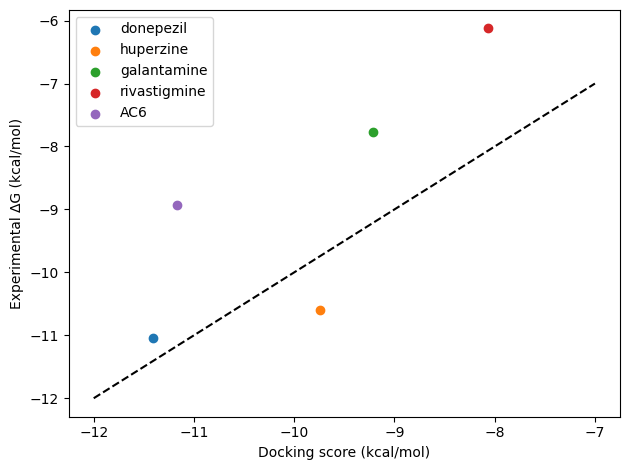

In [69]:
# @title ### Plot the lowest (best) docking score versus the experimental ∆G
# @markdown $\Delta G = +RT \ln K_d \approx +RT \ln$ IC50.  Assume that $RT$ is 0.592 kcal/mol.

import numpy as np

RT = 0.592 # kcal/mol
ligands = ['donepezil', 'huperzine', 'galantamine', 'rivastigmine', 'AC6']
receptor_codes = ['4ey7', '4ey5', '4ey6']

best_scores = [] # in order of ligands above
dG_values = []

for ligand in ligands:

    all_scores = []
    for rec_code in receptor_codes:

        resultname = f'{rec_code}_{ligand}'
        csvfile = SUMMARY_DIR / f'{resultname}.csv'

        result = pd.read_csv(csvfile)
        all_scores += result['score (kcal/mol)'].tolist()

    print('all_scores', all_scores)
    best_scores.append(min(all_scores))

    IC50_value = df[df['ligand'] == ligand]['IC50(nM)'].iloc[0]
    dG_values.append( RT*np.log(IC50_value*1e-9) )

print('best_scores', best_scores)
print('dG_values', dG_values)

### Make a plot
from matplotlib import pyplot as plt
plt.figure()
for i in range(len(ligands)):
    plt.scatter(best_scores[i], dG_values[i], label=ligands[i])
plt.plot([-12,-7], [-12,-7], 'k--')
plt.legend(loc='best')
plt.xlabel('Docking score (kcal/mol)')
plt.ylabel('Experimental ∆G (kcal/mol)')
plt.tight_layout()
plt.show()




In [70]:
ligand_list = df['ligand'].tolist()
print("List of ligands:", ligand_list)

List of ligands: ['donepezil', 'huperzine', 'galantamine', 'rivastigmine', 'AC6']


This creates a new Python list `ligand_list` containing all the values from the 'ligand' column.

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert lists to numpy arrays and reshape for sklearn
X = np.array(best_scores).reshape(-1, 1)
y = np.array(dG_values)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y, X))
mae = mean_absolute_error(y, X)
r_squared = r2_score(y, X)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f} kcal/mol")
print(f"Mean Absolute Error (MAE): {mae:.3f} kcal/mol")
print(f"Coefficient of Determination (R^2): {r_squared:.3f}")

Root Mean Squared Error (RMSE): 1.531 kcal/mol
Mean Absolute Error (MAE): 1.368 kcal/mol
Coefficient of Determination (R^2): 0.286


Coefficient of Determination (R^2): 0.503


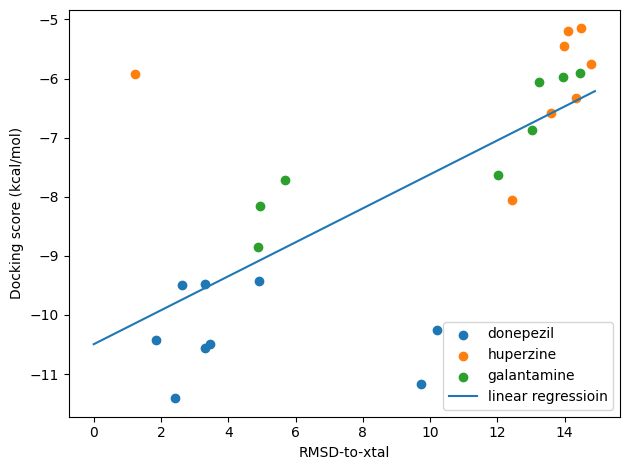

Slope (m): 0.287
Intercept (b): -10.494


In [93]:
# @title Make a scatter plot of the predicted binding free energy (the docking score) versus RMSD-to-xtal.
#

ligand_rec_pairs = [('donepezil','4ey7'), ('huperzine','4ey5'), ('galantamine','4ey6')]

from matplotlib import pyplot as plt
plt.figure()

all_scores = []
all_rmsd_to_xtals = []

for pair in ligand_rec_pairs:

    ligand = pair[0]
    rec_code = pair[1]

    resultname = f'{rec_code}_{ligand}'
    csvfile = SUMMARY_DIR / f'{resultname}.csv'

    result = pd.read_csv(csvfile)
    scores = result['score (kcal/mol)'].tolist()
    rmsd_to_xtals = result['RMSD-to-xtal (A)'].tolist()

    all_scores += scores
    all_rmsd_to_xtals += rmsd_to_xtals

    plt.scatter(rmsd_to_xtals, scores, label=ligand)


# Fit a linear regression model and calculate R^2
X = np.array(all_rmsd_to_xtals).reshape(-1, 1)
y = np.array(all_scores)
model = LinearRegression()

model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

rmsd_range = np.arange(0,15,0.1).reshape(-1, 1)
plt.plot(rmsd_range, model.predict(rmsd_range), label="linear regressioin")

# Calculate metrics
y_pred = model.predict(X)
r_squared = r2_score(y,y_pred)

print(f"Coefficient of Determination (R^2): {r_squared:.3f}")
plt.legend(loc='best')
plt.xlabel('RMSD-to-xtal')
plt.ylabel('Docking score (kcal/mol)')
plt.tight_layout()
plt.show()


# Optionally, print the regression line parameters
print(f"Slope (m): {model.coef_[0]:.3f}")
print(f"Intercept (b): {model.intercept_:.3f}")